# **Random Forest Regression**

Random Forest bir Ensemble Learning üyesidir.

**Ensemble Learning**: Aynı anda birçok machine learning algoritmasını kullanarak ortalamalarını alır ve bir model oluşturur.

Ensemble Learning algoritmaları birden çok algoritmayı birleştirdiği için çok güçlü algoritmalardır. 

Random Forest, decision tree’lerin ortalamasından bir model oluşturur.

Random Forest algoritmasında, data train ve test olarak ayrılır.

Train datasından n tane sample seçilerek bir **sub_data** oluşturulur.

Oluşturulan sub_data **decision tree** ile train edilerek bir **decision tree modeli** oluşturulur.

Bu işlem sonunda tekrardan train datasından n tane sample seçilerek bir **sub_data** oluşturulur ve oluşturulan sub_data **decision tree** ile train edilir.

Böylelikle n tane decision tree'den oluşan bir tane random forest modeli elde edilir.

Test datası tüm decision tree'lere, aslında bir kere random forest modeline yollanır.

Her bir decision tree'den bir test sonucu ortaya çıkar.

Decision tree'lerdeki test sonucuna (mor,mor,mavi) bakılarak çoğunluğa göre random forest modelinin sonucu (mor) oluşturulur. Bu işlem tekrar başa dönüp tekrarlanarak oluşturulan model güçlendirilir.

Random forest algoritması dizi, film öneren siteler gibi recommendation systemlerde, body-part classificationda, stock price predictionda kullanılır.

**Random Forest Regression**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Kullanıcak data tribünlerdeki koltukların seviyeleri ve fiyatlarından oluşmaktadır.

Koltuk seviyeleri x feature'ını, koltuk fiyatları y label'ını oluşturmaktadır.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/random+forest+regression+dataset.csv", sep=";", header=None)
#datada sütunların adları olmadığından header=None kullanılmazsa ilk satırı sütun adları olarak alır.

In [ ]:
df

,0,1
0,1,100
1,2,80
2,3,70
3,4,60
4,5,50
5,6,40
6,7,30
7,8,20
8,9,10
9,10,5


In [ ]:
x = df.iloc[:,0].values.reshape(-1,1) 
y = df.iloc[:,1].values.reshape(-1,1)#values methodu ile pandas series array'e çavrilip, reshape methodu ile 1 sütundan oluştuğu sklearn'e bildirilir.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100 , random_state=42) # RandomForestRegressor modeli rf adlı variable'a eşitlenir.

**n_estimators** parametresi ile random forest modelinde kullanılacak decision tree'lerin sayıları belirlenir.

Datanın içinden seçilecek sub_data random bir şekilde seçilir.

Eğer bir sub_data değeri belirlenmezse kod her çalıştırıldığında seçilen sub_data değeri değişeceğinden sonuç değişir.

**random_state** parametresi ile datanın içinden ne kadar sub_data seçileceği belirlenir ve her seferinde data aynı şekilde bölünür. Böylelikle kod her çalıştırıldığında aynı sonuç elde edilmiş olur.

In [ ]:
rf.fit(x,y) #x ve y değerleri kullanılarak model fit edilir.
print("7.8 seviyesinde fiyat değeri: ",rf.predict([[7.8]])) #oluşturulan modele göre prediction yapılır.

7.8 seviyesinde fiyat değeri:  [22.7]


In [ ]:
x_ = np.arange(min(x),max(x),0.01).reshape(-1,1)  
#x değerleri 1-10 arasındadır.
#plotta bir leaf'teki tüm x değerlerinin aynı sonucu vermesi için minimum x değerinden maximum x değerine kadar 0.01 aralıklar ile sayılar üretilir.

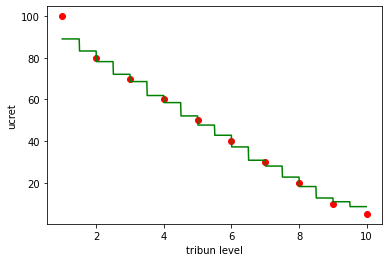

In [ ]:
y_head = rf.predict(x_)  #x değerlerine karşılık gelen y değerleri predict edilir ve bu yapılan prediction'ın görselleştirmesi yapılır.
plt.scatter(x,y,color="red")
plt.plot(x_,y_head,color="green")
plt.xlabel("tribun level")
plt.ylabel("ucret")
plt.show()

Random Forest'ta yüz tane Decision Tree kullanılırken, decision tree'de 1 tane kullanılır. Bu yüzden Random Forest decision tree'den daha iyi sonuçlar verir.

**Random Forest Classification**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data/data.csv")

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Data kanserin iyi huylu mu, kötü huylu mu olduğunu gösterir.

Diagnosis sütununda bulunan 'M' harfi malignant kötü huylu demektir.

'B' harfi benign iyi huylu tümör demektir.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Datada 569 sample bulunmaktadır.

33 sütun bulunmakta, bu sütunların 31 tanesi float değer, 1 tanesi integer değer, 1 tanesi de string değer bulundurmaktadır.

'Unnamed: 32' sütunundaki değerlerin hepsinin missing value olduğu görülür.

Model oluşturulurken 'id' ve 'Unnamed: 32' sütunları sınıflandırmada bir etkisi olmayacağından kullanılmayacaktır.

In [ ]:
data.drop(["Unnamed: 32","id"],axis=1, inplace=True)
#axis=1 olduğunda sütun drop edilir.
#inplace=True olduğunda yapılan değişiklik dataya kaydedilir.

İyi huylu ve kötü huylu tümörün görselleştirilmesi için birbirinden ayrılması gerekir.

In [ ]:
M = data[data.diagnosis=="M"]
B = data[data.diagnosis=="B"]

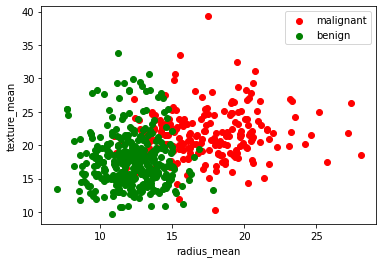

In [ ]:
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="malignant") 
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="benign")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

texture_mean ve radius_mean kullanılarak classify yapılacaktır.

In [ ]:
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis] 
#diagnosis sütunundaki veriler string olduğundan sınıflandırma yapılırken karşılaştırma yapılamaz.
#bu yüzden kötü huylu tümör '1'e , iyi huylu tümör '0'a dönüştürülür.

y = data.diagnosis.values #pandas series values methodu ile numpy array'e çevrilir.

In [ ]:
x_data= data.iloc[:,1:3].values

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size=0.3,random_state=1)
#random_state parametresiyle data train ve test olarak bölünürken kod her çalıştırıldığında aynı randomlıkta bölünür.
#bu parametre kullanılmazsa data her seferinde farklı yerlerden train ve test olarak ayrılacaktır.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [ ]:
#random forest classification model
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=30,max_depth=3, random_state=1,criterion="entropy")
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=30,
                       random_state=1)

In [ ]:
#prediction
y_head = rf_classifier.predict(x_test)

In [ ]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_head)
print("Accuracy of random forest classification: {}".format(accuracy))

Accuracy of random forest classification: 0.8771929824561403


Random Forest Classification algoritmasıyla yapılan predictionların %87'si doğrudur.

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_head)

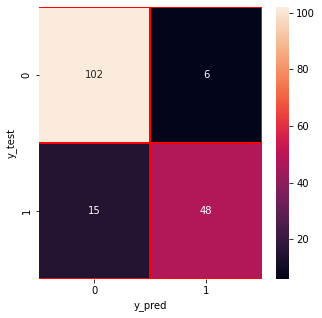

In [ ]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm,annot=True,fmt= '.0f',linewidths=0.5,linecolor="red",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

0-> iyi huylu tümör

1 -> köyü huylu tümör

**Confusion Matrix**

**TN** **FP**

**FN** **TP** 

Confusion matrix'e bakarak;
iyi huylu tümörde 108 sample'ın 102'sinin doğru tahmin edildiği, 6 sample'ın gerçekte iyi huylu tümör olup kötü huylu tümör olarak yanlış tahmin edildiği,

kötü huylu tümörde 63 sample'ın 48'sinin doğru tahmin edildiği, 15 sample'ın gerçekte kötü huylu tümör olup iyi huylu tümör olarak yanlış tahmin edildiği görülür.

In [ ]:
Acc = []
for i in range (1,6):
  for j in range(1,100):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(max_depth=i,random_state = 1,n_estimators = j)
    rfc.fit(x_train,y_train)
    Acc.append(rfc.score(x_test,y_test))

In [ ]:
len(Acc)

495

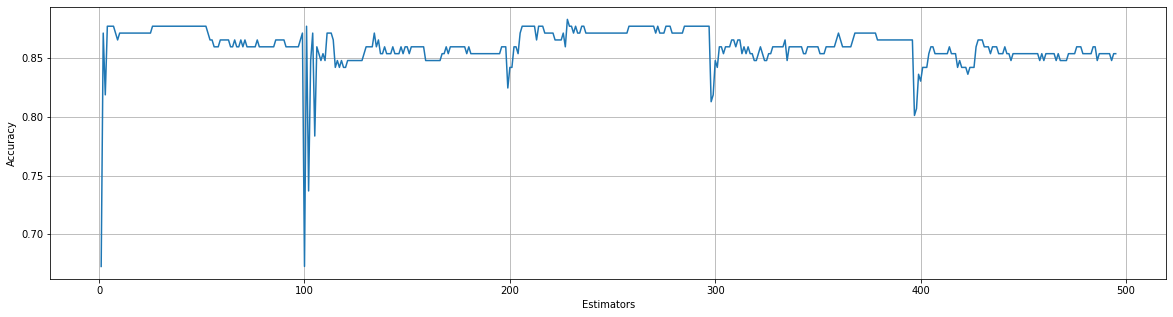

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(range(1,496),Acc)
plt.xlabel("Estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

**max_depth** -> tree'nin kökü ve yaprakları arasındaki maksimum derinlik sayısıdır.

**n_estimators** -> random forest modelinde kullanılacak decision tree sayısıdır.

Bu parametrelere göre accuracy değerlerine bakılmıştır.

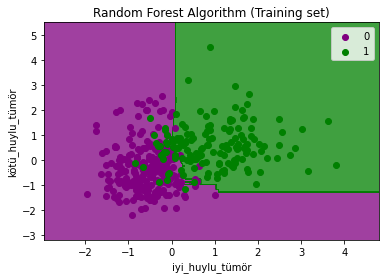

In [ ]:
#Visualizing the training set result
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step =0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, rf_classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('purple','green' )))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],c = ListedColormap(('purple', 'green'))(i), label = j)
plt.title('Random Forest Algorithm (Training set)')
plt.xlabel('iyi_huylu_tümör')
plt.ylabel('kötü_huylu_tümör')
plt.legend()
plt.show()

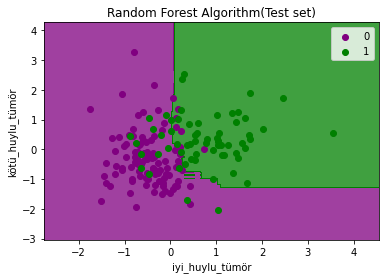

In [ ]:
#Visualizing the test set result
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step =0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, rf_classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('purple','green' )))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
c = ListedColormap(('purple', 'green'))(i), label = j)
plt.title('Random Forest Algorithm(Test set)')
plt.xlabel('iyi_huylu_tümör')
plt.ylabel('kötü_huylu_tümör')
plt.legend()
plt.show()